In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

In [2]:
accesos = pd.read_csv("Escritorio/Datos/acces-log-bots_modificado.csv", encoding='ISO-8859-1')
def procesar_valor(valor):
    arreglo = valor.split('/')
    if arreglo[1] == "norm.php":
        return "Otro"
    if arreglo[1] == "handle":
        return "Vista"
    elif arreglo[1] == "bitstream":
        return "Descarga"
    elif arreglo[1] == "feed":
        return "Feed"
    elif arreglo[1] == "themes":
        return "Estatico"
    elif arreglo[1] == "static":
        return "Estatico"
    elif arreglo[1] == "open-search":
        return "Open-Search"
    elif arreglo[1] == "":
        return "Otro"
    elif re.match(r".*discover.*",arreglo[1]):
        return "Busqueda"
    elif re.match(r".*search-filter.*",arreglo[1]):
        return "Busqueda"
    elif re.match(r".*browse.*",arreglo[1]):
        return "Busqueda"
    elif re.match(r".*?id.*",arreglo[1]):
        return "Raro"
    elif arreglo[1] == "robots.txt":
        return "Robot"
    elif re.match(r".*robots.txt.*",arreglo[1]):
        return "Robot"
    elif arreglo[1] == "oai":
        return "Oai"
    elif arreglo[1] == "images":
        return "Estatico"
    elif arreglo[1] == "pages":
        return "Otro"
    elif arreglo[1] == "blog":
        return "Otro"
    elif re.match(r".*favicon.*",arreglo[1]): #Preguntar donde va
        return "Estatico"
    elif re.match(r".*apple-touch-icon.*",arreglo[1]): #Pregunar donde va
        return "Estatico"
    elif re.match(r".*wp-.*",arreglo[1]):
        return "Raro"
    elif arreglo[1] == "password-login":
        return "Otro"
    elif arreglo[1] == "login":
        return "Otro"
    elif arreglo[1] == "forgot":
        return "Otro"
    elif arreglo[1] == "admin":
        return "Otro"
    elif arreglo[1] == "register":
        return "Otro"
    elif re.match(r".*register.*",arreglo[1]):
        return "Otro"
    elif arreglo[1] == "profile":
        return "Otro"
    elif arreglo[1] == "community-list":
        return "Otro"
    elif arreglo[1] == "submissions":
        return "Otro"
    elif re.match(r".*submit.*",arreglo[1]):
        return "Otro"
    elif re.match(r".*js",arreglo[1]): 
        return "Estatico"
    elif re.match(r".*php",arreglo[1]):
        return "Raro"
    elif re.match(r".*xml",arreglo[1]):
        return "Raro"
    elif re.match(r".*choices.*",arreglo[1]):
        return "Otro"
    elif re.match(r".*pdf",valor):
        return "Raro"
    elif re.match(r"^\..*",arreglo[1]):
        return "Raro"
    elif arreglo[1] == "C":
        return "Raro"
    elif re.match(r".*etal.*",valor):
        return "Otro"
    elif re.match(r"^\?.*",arreglo[1]):
        return "Raro"
    elif re.match(r".*sitemap.*",valor):
        return "Sitemap"
    elif arreglo[1] == "templates":
        return "Estatico"
    elif arreglo[1] == "logout":
        return "Otro"
    elif arreglo[1] == "css":
        return "Estatico"
    elif re.match(r".*search.*",arreglo[1]):
        return "Busqueda"
    elif re.match(r".*wlwmanifest.xml",valor):
        return "Raro"
    elif arreglo[1] == "sites":
        return "Otro"
    elif arreglo[1] == "administrator":
        return "Raro"
    else:
        return "Otro"
    
accesos['tipo'] = accesos['recurso'].apply(procesar_valor)
accesos['isGET'] = accesos['metodo'].apply(lambda x: 1 if x == 'GET' else 0)
accesos['isPOST'] = accesos['metodo'].apply(lambda x: 1 if x == 'POST' else 0)
accesos['isOTHER'] = accesos['metodo'].apply(lambda x: 1 if x != 'GET' and x != 'POST' else 0)
accesos.drop(['metodo'], axis=1, inplace=True)

isBot
True     161980
False     96688
Name: count, dtype: int64


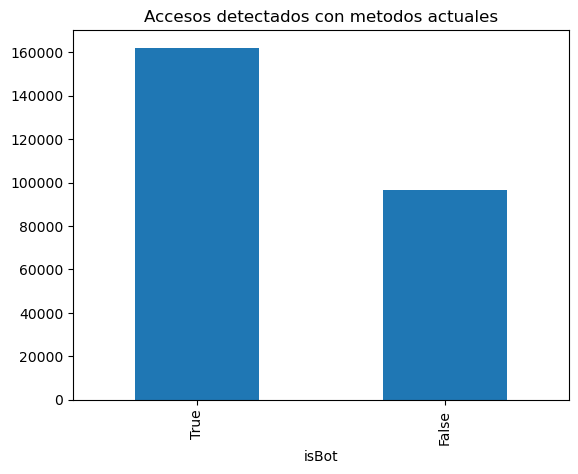

In [3]:
print(accesos["isBot"].value_counts())
plot = accesos["isBot"].value_counts().plot(
    kind="bar", 
    title="Accesos detectados con metodos actuales")

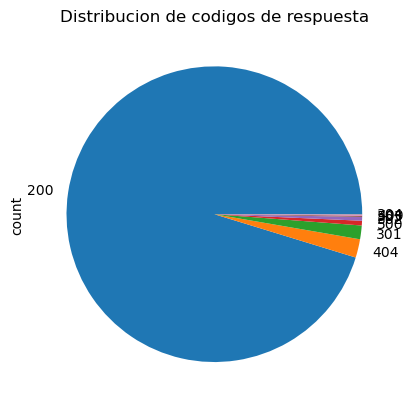

In [4]:
plot = accesos[accesos["isBot"]==False]["codRespuesta"].value_counts().plot(
    kind="pie", 
    title="Distribucion de codigos de respuesta")

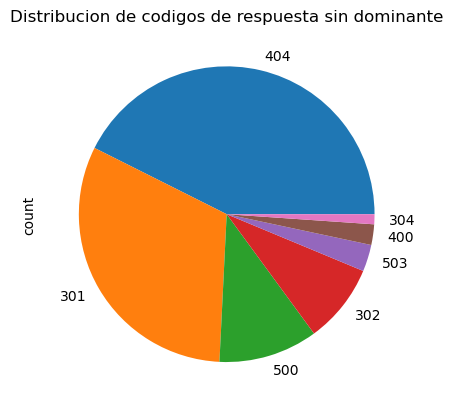

In [5]:
plot = accesos.loc[accesos["isBot"]==False].loc[accesos["codRespuesta"]!=200]["codRespuesta"].value_counts().plot(
    kind="pie", 
    title="Distribucion de codigos de respuesta sin dominante")

/tmp/ipykernel_25848/2066649695.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = accesos[accesos["isBot"]==False][accesos["codRespuesta"]!=200][["codRespuesta", "tipo"]]
/tmp/ipykernel_25848/2066649695.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(factores_cod, rotation=45)
/tmp/ipykernel_25848/2066649695.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(factores_tipo, rotation=-15)


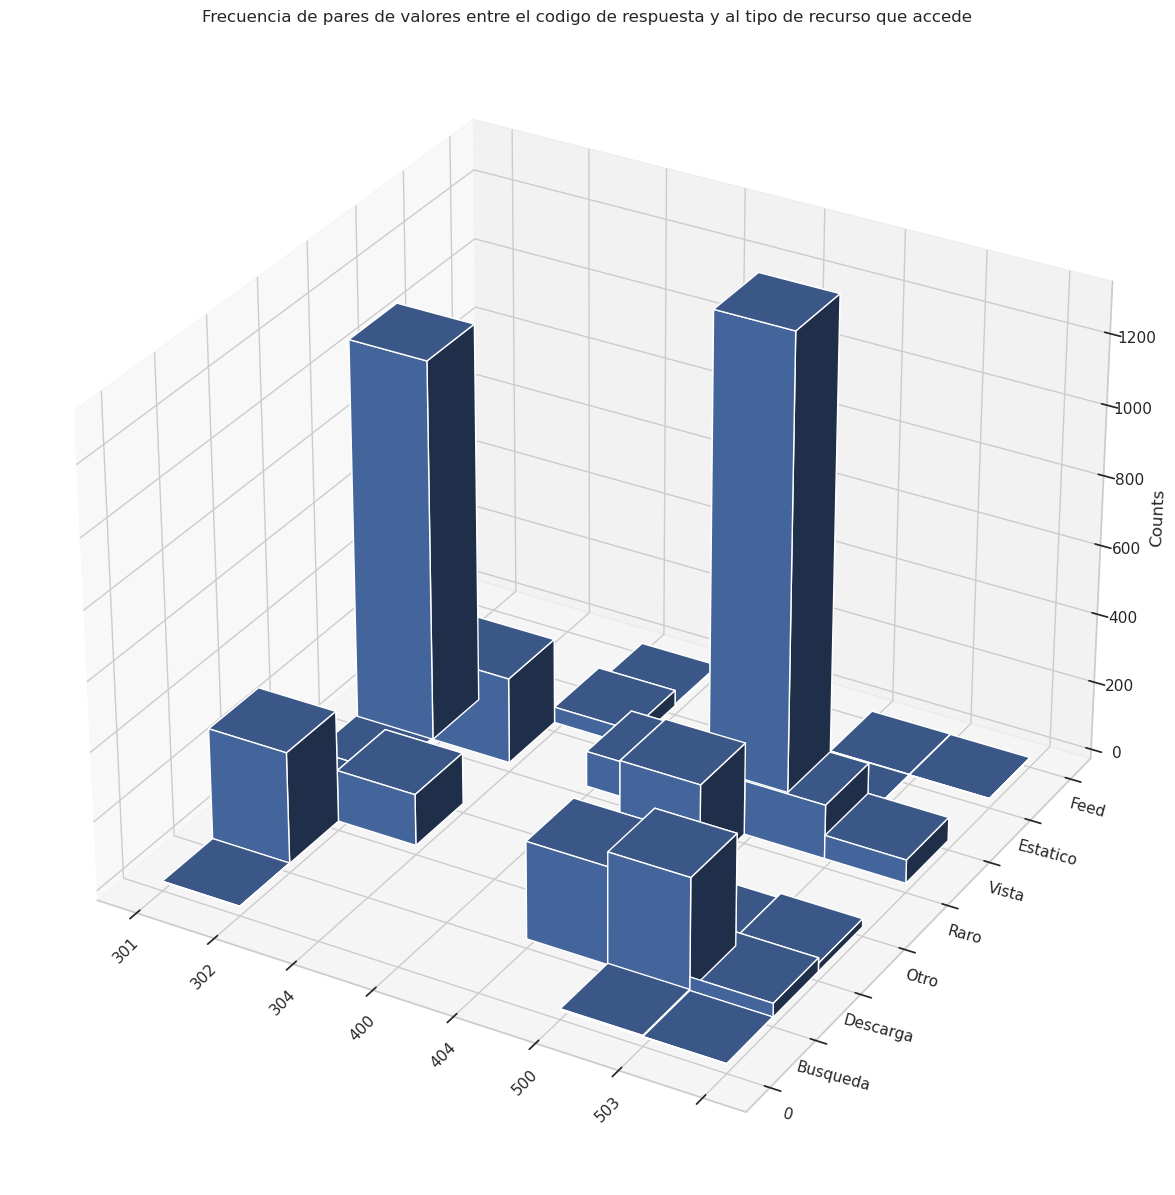

['0', '0', 'Busqueda', 'Descarga', 'Otro', 'Raro', 'Vista', 'Estatico', 'Feed']


In [6]:
df = accesos[accesos["isBot"]==False][accesos["codRespuesta"]!=200][["codRespuesta", "tipo"]]
df["codRespuesta"] = df["codRespuesta"].astype(str)

# Crear un DataFrame con la frecuencia de aparición de pares de valores
df_counts = df.groupby(['codRespuesta', 'tipo']).size().reset_index(name='Counts')

# Utilizar factorize para asignar códigos a las categorías únicas
factores_cod = pd.factorize(df_counts['codRespuesta'])[1].to_list()
factores_cod.insert(0, "0")
df_counts['codRespuesta'] = pd.factorize(df_counts['codRespuesta'])[0]

factores_tipo = pd.factorize(df_counts['tipo'])[1].to_list()
factores_tipo.insert(0, "0")
factores_tipo.insert(0, "0")
df_counts['tipo'] = pd.factorize(df_counts['tipo'])[0]

# Graficar con Seaborn
sns.set(style="whitegrid")

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(df_counts['codRespuesta'], df_counts['tipo'], 0, 1, 1, df_counts['Counts'], shade=True)

#ax.set_ylabel('tipo')
ax.set_zlabel('Counts')


ax.set_xticklabels(factores_cod, rotation=45)
ax.set_yticklabels(factores_tipo, rotation=-15)


plt.title('Frecuencia de pares de valores entre el codigo de respuesta y al tipo de recurso que accede')
plt.show()
print(factores_tipo)

In [7]:
fig = px.scatter_3d(df_counts, x='codRespuesta', y='tipo', z='Counts',
                    labels={'codRespuesta_code': 'codRespuesta', 'tipo_code': 'tipo', 'Counts': 'Frecuencia'},
                    title='Frecuencia de pares de valores entre codRespuesta y tipo')


# Mostrar el gráfico interactivo
#fig.show()

/tmp/ipykernel_25848/4055790041.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_25848/4055790041.py:27: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



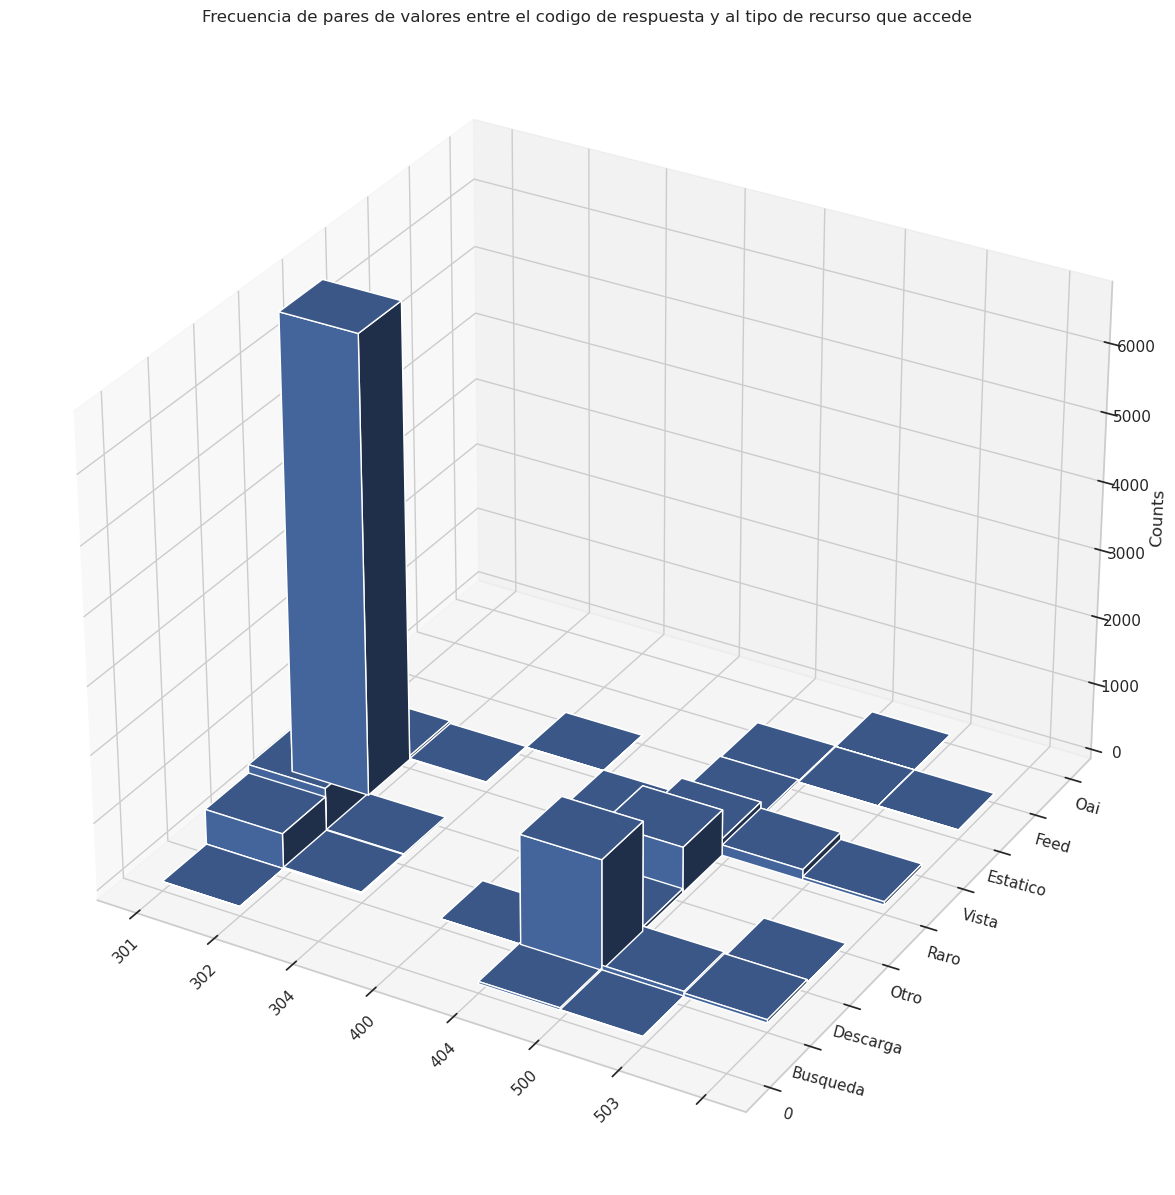

['0', '0', 'Busqueda', 'Descarga', 'Otro', 'Raro', 'Vista', 'Estatico', 'Feed', 'Oai']


In [8]:
df = accesos[accesos["isBot"]==True].loc[accesos["codRespuesta"]!=200][["codRespuesta", "tipo"]]
df["codRespuesta"] = df["codRespuesta"].astype(str)

# Crear un DataFrame con la frecuencia de aparición de pares de valores
df_counts = df.groupby(['codRespuesta', 'tipo']).size().reset_index(name='Counts')

# Utilizar factorize para asignar códigos a las categorías únicas
factores_cod = pd.factorize(df_counts['codRespuesta'])[1].to_list()
factores_cod.insert(0, "0")
df_counts['codRespuesta'] = pd.factorize(df_counts['codRespuesta'])[0]

factores_tipo = pd.factorize(df_counts['tipo'])[1].to_list()
factores_tipo.insert(0, "0")
factores_tipo.insert(0, "0")
df_counts['tipo'] = pd.factorize(df_counts['tipo'])[0]

# Graficar con Seaborn
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(df_counts['codRespuesta'], df_counts['tipo'], 0, 1, 1, df_counts['Counts'], shade=True)

#ax.set_ylabel('tipo')
ax.set_zlabel('Counts')


ax.set_xticklabels(factores_cod, rotation=45)
ax.set_yticklabels(factores_tipo, rotation=-15)


plt.title('Frecuencia de pares de valores entre el codigo de respuesta y al tipo de recurso que accede')
plt.show()
print(factores_tipo)

In [9]:
print(accesos[accesos["isBot"]==True][accesos["codRespuesta"]==301]["recurso"])

55        /bitstream/10915/31664/1/AUTINO
353       /bitstream/10915/31664/1/AUTINO
540                            /blog/feed
596       /bitstream/10915/31664/1/AUTINO
615                           /blog/feed/
                       ...               
258567       /?id=ARG-UNLP-Rev-0000000165
258580       /?id=ARG-UNLP-TPG-0000000533
258592       /?id=ARG-UNLP-TDG-0000000193
258598       /?id=ARG-FARM-ART-0000000348
258611       /?id=ARG-UNLP-ART-0000000270
Name: recurso, Length: 7962, dtype: object


/tmp/ipykernel_25848/3452633399.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [10]:
print(accesos[accesos["codRespuesta"]==404].loc[accesos["isBot"]==False].loc[accesos["tipo"]=="Raro"]["ip"].value_counts())

ip
4.36.152.218       2
197.231.239.203    2
187.61.95.226      2
200.75.137.221     2
102.218.51.48      2
                  ..
43.139.184.187     1
49.144.200.88      1
186.12.56.101      1
104.200.151.114    1
194.169.175.26     1
Name: count, Length: 137, dtype: int64


/home/rafael/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/rafael/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/rafael/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/rafael/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/rafael/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype i

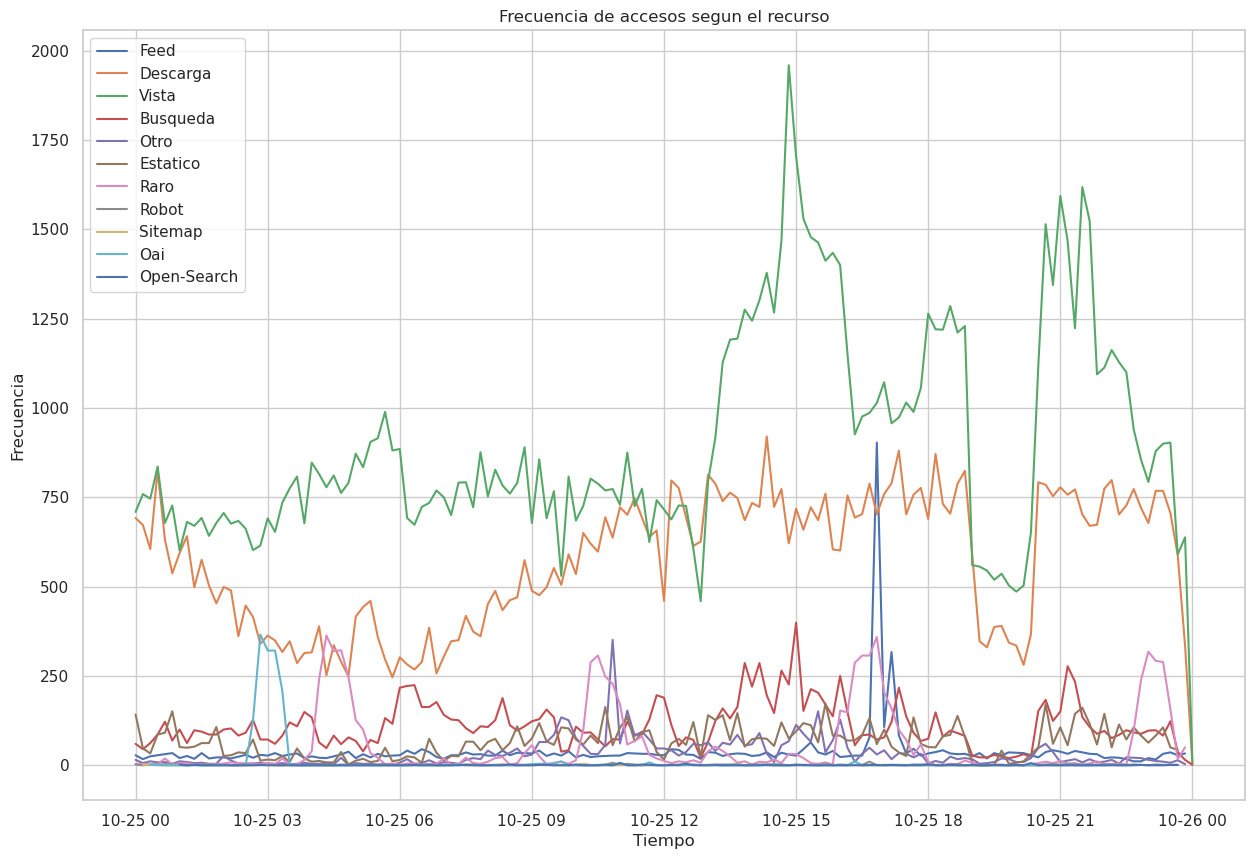

In [11]:
lista_valores = accesos["tipo"].unique()

plt.figure(figsize=(15, 10))

for tipo in lista_valores:
    accesos_tipo = pd.Series()
    accesos_tipo = accesos.loc[accesos['tipo'] == tipo][['tipo','dateRaw']]
    accesos_tipo['dateRaw'] = pd.to_datetime(accesos_tipo['dateRaw'])
    serie = accesos_tipo.resample('10T', on='dateRaw').count()
    serie = serie.reset_index()
    
    sns.lineplot(x='dateRaw', y='tipo', data=serie, label=tipo)
    
plt.title('Frecuencia de accesos segun el recurso')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')

plt.legend()

plt.show()

In [12]:
print(accesos.loc[accesos["codRespuesta"] == 301].loc[accesos["tipo"] == "Busqueda"]["ip"].value_counts())

ip
54.184.159.16      1
186.190.182.144    1
Name: count, dtype: int64


/tmp/ipykernel_25848/3306201189.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/rafael/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/rafael/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/rafael/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/rafael/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


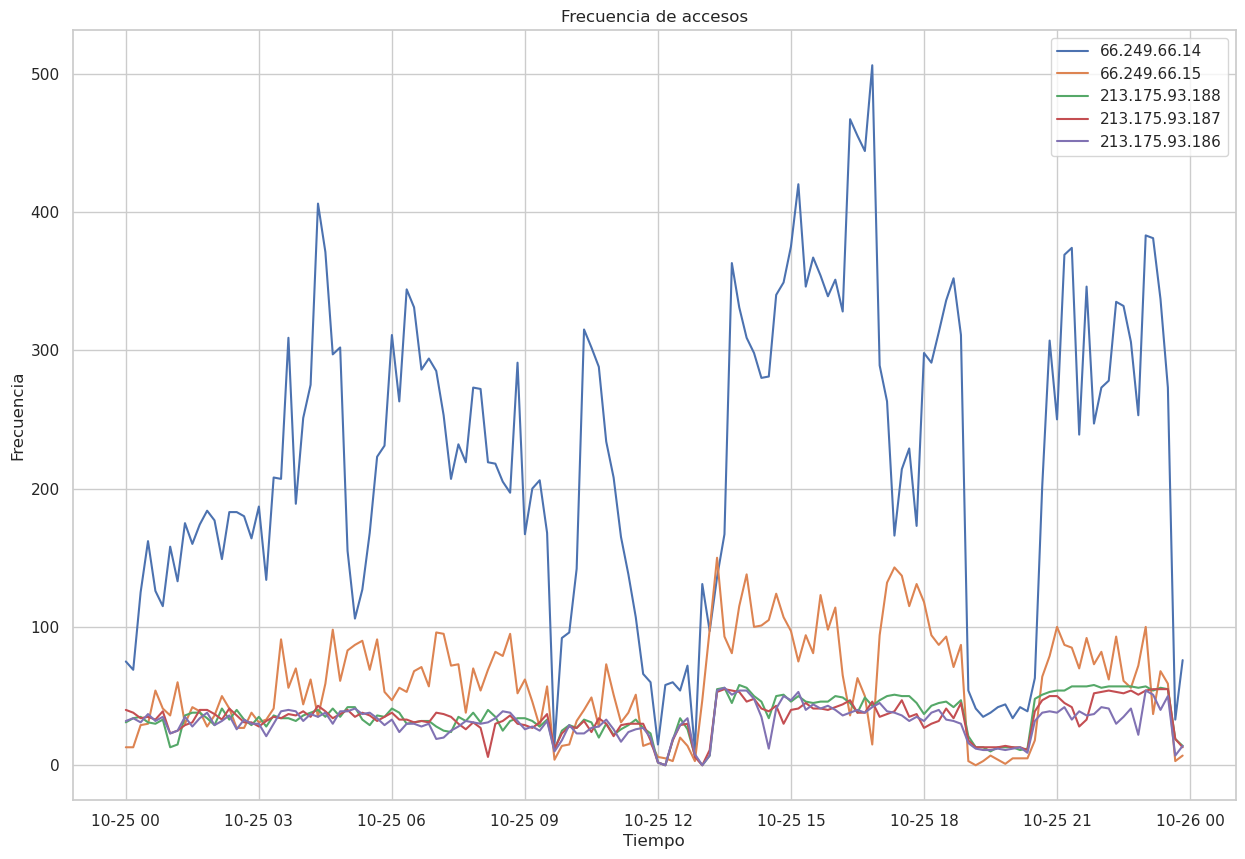

In [13]:
expresion_regular = r"^/themes.*"
df_filtrado = accesos[~accesos['recurso'].str.contains(expresion_regular)][['ip','dateRaw']]
count = df_filtrado["ip"].value_counts().nlargest(5)
ip_list = count.index.to_list()

plt.figure(figsize=(15, 10))

for row in ip_list:
    ip = row
    accesos_ip = pd.Series()
    accesos_ip = accesos[accesos['ip'] == ip][~accesos['recurso'].str.contains(expresion_regular)][['ip','dateRaw']]
    accesos_ip['dateRaw'] = pd.to_datetime(accesos_ip['dateRaw'])
    serie = accesos_ip.resample('10T', on='dateRaw').count()
    serie = serie.reset_index()
    #print(serie)
    
    sns.lineplot(x='dateRaw', y='ip', data=serie, label=ip)
    
plt.title('Frecuencia de accesos')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')

plt.legend()

plt.show()

/tmp/ipykernel_25848/2269569888.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_25848/2269569888.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/rafael/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/rafael/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/rafael/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/rafael/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_n

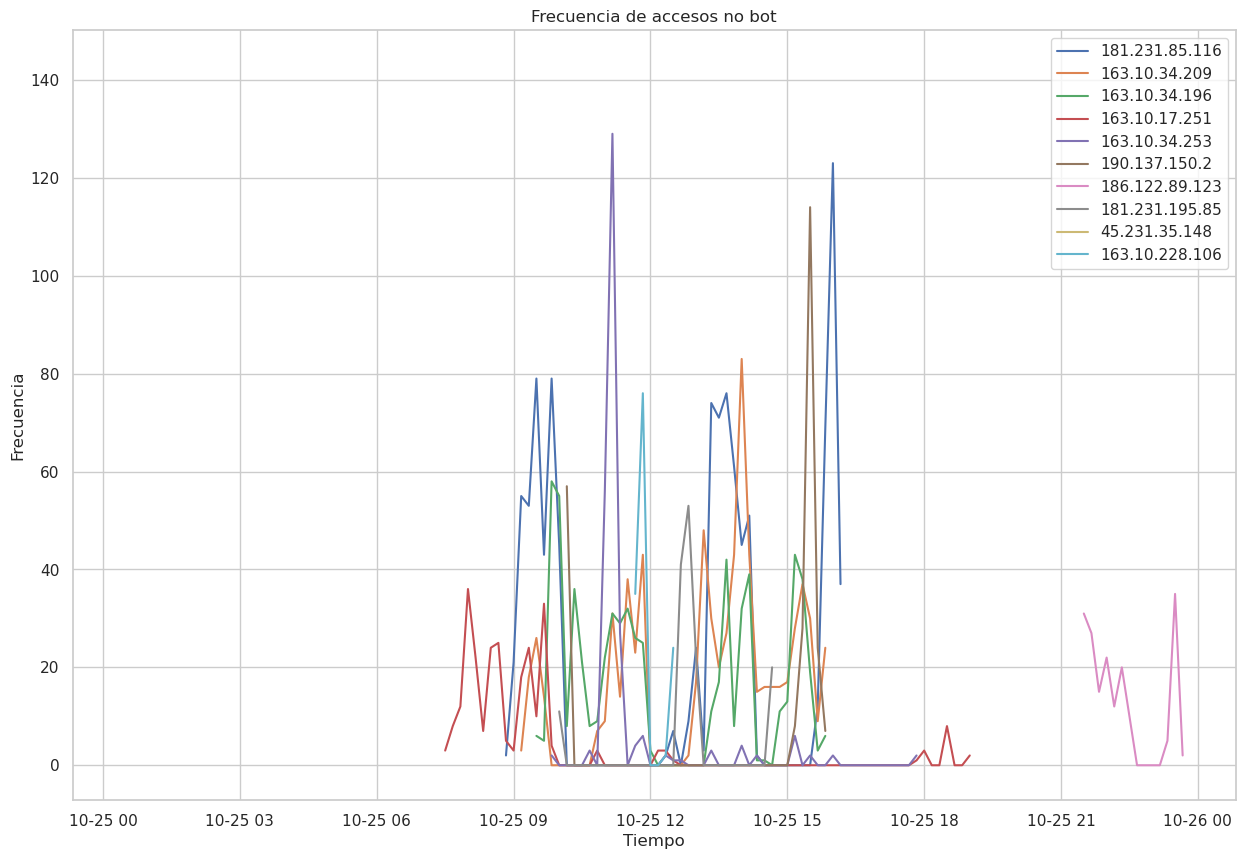

In [14]:
expresion_regular = r"^/themes.*"
df_filtrado = accesos[accesos["isBot"]==False][~accesos['recurso'].str.contains(expresion_regular)][['ip','dateRaw']]
count = df_filtrado["ip"].value_counts().nlargest(10)
ip_list = count.index.to_list()

plt.figure(figsize=(15, 10))


for row in ip_list:
    ip = row
    accesos_ip = pd.Series()
    accesos_ip = accesos[accesos['ip'] == ip][~accesos['recurso'].str.contains(expresion_regular)][['ip','dateRaw']]
    accesos_ip['dateRaw'] = pd.to_datetime(accesos_ip['dateRaw'])
    serie = accesos_ip.resample('10T', on='dateRaw').count()
    serie = serie.reset_index()
    #print(serie)
    
    sns.lineplot(x='dateRaw', y='ip', data=serie, label=ip)
    
plt.title('Frecuencia de accesos no bot')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')

plt.legend()

plt.show()

/tmp/ipykernel_25848/3792459592.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



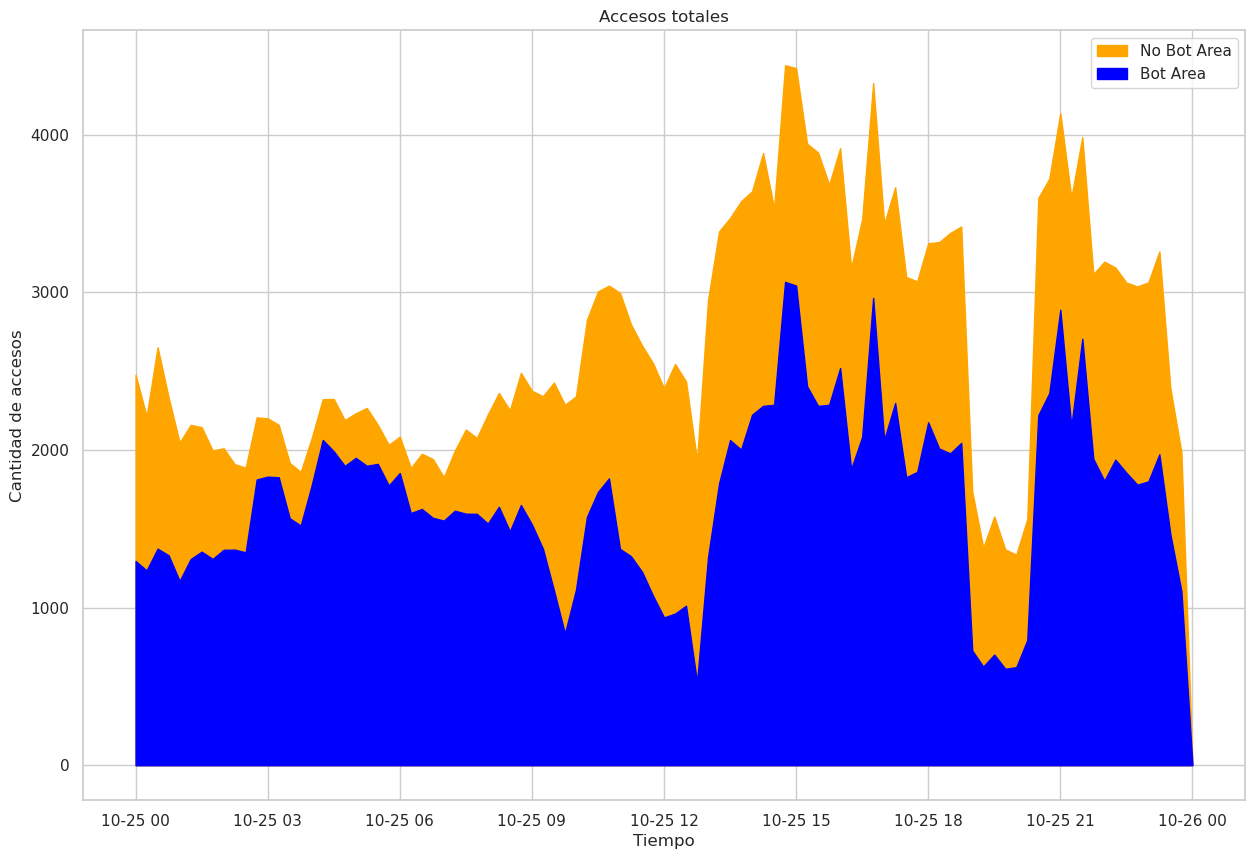

In [15]:
# Filtrar por 'isBot' True
accesos_bot = accesos.loc[accesos["isBot"]==True]
accesos_bot['dateRaw'] = pd.to_datetime(accesos_bot['dateRaw'])
serie_bot = accesos_bot.resample('15T', on='dateRaw').count()
serie_bot = serie_bot.reset_index()

# Filtrar por 'isBot' False
accesos_no_bot = accesos
accesos_no_bot['dateRaw'] = pd.to_datetime(accesos_no_bot['dateRaw'])
serie_no_bot = accesos_no_bot.resample('15T', on='dateRaw').count()
serie_no_bot = serie_no_bot.reset_index()
#print(serie)

plt.figure(figsize=(15, 10))

#sns.lineplot(x='dateRaw', y='isBot', data=serie_bot)


#sns.lineplot(x='dateRaw', y='isBot', data=serie_no_bot)
plt.fill_between(serie_no_bot['dateRaw'], serie_no_bot['isBot'], color='orange', alpha=1, label="No Bot Area")
plt.fill_between(serie_bot['dateRaw'], serie_bot['isBot'], color='blue', alpha=1, label="Bot Area")

    
plt.title('Accesos totales')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de accesos')

plt.legend()

plt.show()

In [16]:
#print(accesos[accesos["ip"]=="181.231.85.116"]) #Safo

In [17]:
#print(accesos[accesos["ip"]=="190.137.150.2"])#No parece Bot

In [18]:
#print(accesos[accesos["ip"]=="45.231.35.148"].loc[accesos["tipo"]=="Descarga"]["recurso"].str.split("/"))#Parece que safa

In [19]:
#print(accesos[accesos["ip"]=="186.122.89.123"])#No parece Bot

In [20]:
#print(accesos[accesos["ip"]=="45.231.35.148"])#No parece Bot

In [21]:
#print(accesos.loc[accesos["isBot"] == False].loc[accesos["codRespuesta"] == 404].loc[accesos["tipo"] == "Raro"]["ip"].value_counts())

In [22]:
#print(accesos[accesos["ip"]=="65.21.136.254"].loc[accesos["codRespuesta"] == 404]) #Diria que no es bot

In [23]:
#print(accesos[accesos["ip"]=="181.56.130.203"])#Caso extraño

In [24]:
print(accesos[accesos["isBot"]==False].loc[accesos["tipo"] == "Raro"]["ip"].value_counts())

ip
181.169.163.184    3
41.38.70.52        2
175.157.10.141     2
182.253.179.237    2
196.189.99.104     2
                  ..
181.231.198.210    1
177.239.38.80      1
186.157.122.156    1
200.7.247.85       1
167.57.6.39        1
Name: count, Length: 309, dtype: int64


In [25]:
#print(accesos[accesos["ip"]=="124.29.249.193"])

Empty DataFrame
Columns: [dateRaw, dia, hora, minuto, segundo, ip, recurso, codRespuesta, UserAgent, isBot, tipo, isGET, isPOST, isOTHER]
Index: []


NameError: name 'value_counts' is not defined